# Model Training and Evaluation

Install `abwoc` and `sunpy`
```
pip install git+https://github.com/PHYS477677/abwoc
pip install sunpy
```
And obtain the sample dataset with
```
curl -LJO https://github.com/PHYS477677/abwoc/raw/master/sample-data/script_testing_set*.npy yourDirectory

```
or download directly from https://github.com/PHYS477677/abwoc/blob/master/sample-data/script_testing_set_171_512_normalized.npy

Import the necessary packages:

In [8]:
import abwoc.xray_model as xray_model

## Model Training

Train the model on a given dataset, assuming the sample data was downloaded to the '/sample-data/' directory this can be accomplished through the command below.

Generally, the model can train on a `npy` file that is provided, as long as there is also a corresponding labels `npy` file in the same directory. i.e. for this file there must also be `script_testing_set_171_512_normalized_labels.npy` in the '/sample-data/' directory

In [9]:
dataset_file = './sample-data/script_testing_set_171_512_normalized.npy'

Specify the wavelength to use with the model as a string. The allowed options are '131', '171', and '211' for the individual wavelength models, or 'all' for the three wavelength model. Using a single wavelength for this example:

In [10]:
wavelength = '171'

Also specify the structure of the model (how many convolution layers are used). This can be '1layer', '2layer', or 'ctmodel' for 1, 2, and 3 layer models respectively.

In [11]:
model_struct = '1layer'

Enter the number of epochs to train for. Note that if the model is resuming from a checkpoint at the fifth epoch, and this value is set to five, then the model will train for five additional epochs, ending with a checkpoint file for the tenth epoch.

In [12]:
epochs = 5

Enter the directory to save the checkpoint files to. The checkpoint files will be saved using the name of this directory, so it is advised to have separate directories for each different model.

In [13]:
checkpoint_path = './sample-data/checkpoint_testing/'

Finally, choose whether to load checkpoints, denoted by a boolean, and what epoch to start training from.

In [14]:
load_checkpoint = False
initial_epoch = 0

Now the desired model can be trained, from all of the inputs above this model will:

Train on the './sample-data/script_testing_set_171_512_normalized.npy' dataset

Create a single wavelength, single layer model

Train on the data for five epochs

Save model checkpoints in the directory: './sample-data/checkpoint_testing/'

And begin training the model from scratch

The model will train for five epochs and output the saved weights in the checkpoint directory

A 'npy' file will also be created saving the performance of the model in loss and accuracy vs. epoch. These metrics will also be plotted 

Dataset loaded successfully
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 51, 51, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 332928)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 332929    
Total params: 334,209
Trainable params: 334,209
Non-trainable params: 0
_________________________________________________________________

model name is: checkpoint_testing

Epoch 1/5
9/9 [==============================] - 3s 344ms/step - loss: 0.7478 - accuracy: 0.3176 - val_loss: 0.7233 - val_accuracy: 0.3333

Epoch 00001: val_accuracy improved from -inf

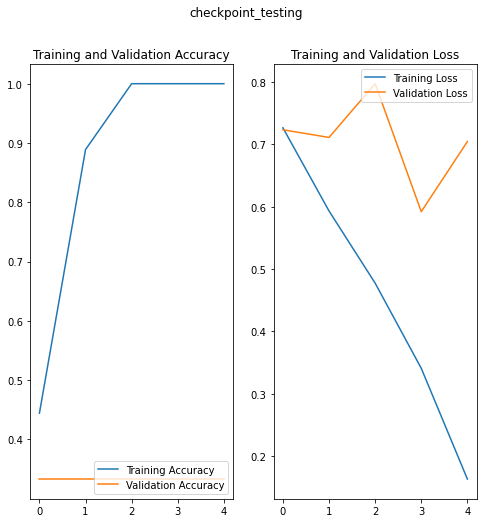

In [18]:
xray_model.model_learn(dataset_file, wavelength, model_struct, epochs, checkpoint_path, load_checkpoint, initial_epoch)

Now to train the model for five more epochs, loading the most recent checkpoint:

Dataset loaded successfully
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 128)     1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 51, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 332928)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 332929    
Total params: 334,209
Trainable params: 334,209
Non-trainable params: 0
_________________________________________________________________

model name is: checkpoint_testing

Epoch 6/10
9/9 [==============================] - 3s 324ms/step - loss: 0.8500 - accuracy: 0.4727 - val_loss: 0.7992 - val_accuracy: 0.3333

Epoch 00006: val_accuracy improved from -

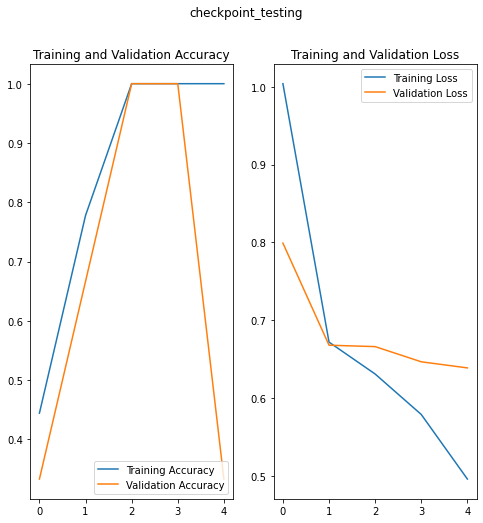

In [19]:
load_checkpoint = True
initial_epoch = 5

xray_model.model_learn(dataset_file, wavelength, model_struct, epochs, checkpoint_path, load_checkpoint, initial_epoch)

## Model Evaluation

The performance of the model can then be evaluated using a given dataset and checkpoint.
Using the model tested above, many of the required inputs are the same as training the model.

In [20]:
dataset_file = './sample-data/script_testing_set_171_512_normalized.npy'
wavelength = '171'
model_struct = '1layer'
checkpoint_path = './sample-data/checkpoint_testing/'

To evaluate the performance of the model at a single epoch, the start and end epochs must be defined as the same value. Entering -1 as the epoch will evaluate the performance of the most recently saved checkpoint.

In [21]:
start_epoch = -1
end_epoch = -1

The below function will then output the accuracy and loss metrics for the most recently saved checkpoint.

In [23]:
xray_model.model_evaluate(dataset_file, wavelength, model_struct, checkpoint_path, start_epoch, end_epoch)

Dataset loaded successfully
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 510, 510, 128)     1280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 51, 51, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 332928)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 332929    
Total params: 334,209
Trainable params: 334,209
Non-trainable params: 0
_________________________________________________________________

model name is: checkpoint_testing

12/12 - 1s - loss: 0.6136 - accuracy: 1.0000
model loss: 0.6135620474815369
model accuracy: 1.0


To instead evaluate the performance of a range of checkpoint files, the start and end epochs can be defined

In [24]:
start_epoch = 6
end_epoch = 8

Now, the ```model_evaluate()``` function will output a plot showing the accuracy and loss metrics for checkpoints saved in the third through the seventh epochs 

Dataset loaded successfully
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 510, 510, 128)     1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 51, 51, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 332928)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 332929    
Total params: 334,209
Trainable params: 334,209
Non-trainable params: 0
_________________________________________________________________

model name is: checkpoint_testing

12/12 - 1s - loss: 0.6925 - accuracy: 0.5000
12/12 - 1s - loss: 0.6410 - accuracy: 0.9167
12/12 - 1s - loss: 0.6136 - accuracy: 1.0000


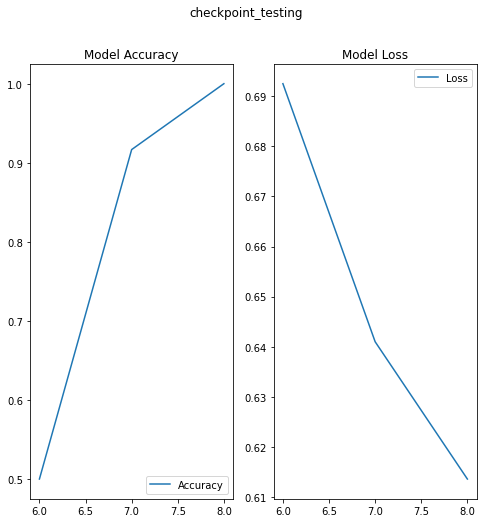

For epochs in the range range(6, 9) accuracy is: [0.5        0.91666669 1.        ]
For epochs in the range range(6, 9) loss is: [0.69252461 0.64098245 0.61356205]


In [26]:
xray_model.model_evaluate(dataset_file, wavelength, model_struct, checkpoint_path, start_epoch, end_epoch)